In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow

In [2]:
import pandas as pd

# Load the Excel dataset
file_path = '/content/drive/MyDrive/Farm Project/Cattle Management System/Monitoring Cattle Growth  and Milk Recording/cattle_growth_milk_prediction_dataset.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()

,Cattle Breed,Weight (kg),Height (cm),Age (years),Feed (kg/day),Nutrition,Vitamin A (%),Vitamin D (%),Vitamin E (%),Vitamin B12 (%),Daily Milk Yield (liters),Milk Fat (%),Milk Protein (%),Milk Lactose (%),Lactation Stage,Reproductive Status,Water Intake (liters/day)
0,JERSEY,420.13,125.42,3.0,8.82,"SOYBEAN MEAL, BARLEY, CORN, ALFALFA",0.93,1.90,1.39,1.69,19.74,3.87,3.93,4.91,MID,NOT PREGNANT,67.77
1,LANKA WHITE,520.32,135.58,7.0,13.46,"CORN, OILSEED MEALS, BARLEY, SOYBEAN MEAL",0.24,1.08,0.96,1.39,7.90,3.48,3.06,5.04,EARLY,NOT PREGNANT,59.30
2,SAHIWAL,457.63,133.06,7.0,8.65,"ALFALFA, CORN, SOYBEAN MEAL, BARLEY",0.23,0.30,1.04,0.34,25.97,3.86,3.09,5.16,LATE,PREGNANT,66.03
3,LANKA WHITE,408.34,127.50,5.0,6.49,"CORN, GROUNDNUTS, SOYBEAN MEAL, BARLEY",1.88,0.52,1.22,1.77,15.06,3.40,3.92,5.03,MID,PREGNANT,58.10
4,AUSTRALIAN MILKING ZEBU,428.58,134.85,7.0,14.02,"BARLEY, SOYBEAN MEAL, COTTONSEED MEAL, LEGUMES...",1.04,0.70,0.27,1.04,14.39,3.96,3.90,5.09,MID,NOT PREGNANT,52.42


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cattle Breed               367 non-null    object 
 1   Weight (kg)                366 non-null    float64
 2   Height (cm)                366 non-null    float64
 3   Age (years)                366 non-null    float64
 4   Feed (kg/day)              366 non-null    float64
 5   Nutrition                  366 non-null    object 
 6   Vitamin A (%)              366 non-null    float64
 7   Vitamin D (%)              366 non-null    float64
 8   Vitamin E (%)              366 non-null    float64
 9   Vitamin B12 (%)            366 non-null    float64
 10  Daily Milk Yield (liters)  366 non-null    float64
 11  Milk Fat (%)               366 non-null    float64
 12  Milk Protein (%)           366 non-null    float64
 13  Milk Lactose (%)           366 non-null    float64

# ***Data Preprocessing ***

In [4]:
selected_columns = ['Cattle Breed', 'Height (cm)', 'Age (years)', 'Feed (kg/day)', 'Lactation Stage', 'Reproductive Status', 'Daily Milk Yield (liters)']
df_selected = df[selected_columns]

In [5]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cattle Breed               367 non-null    object 
 1   Height (cm)                366 non-null    float64
 2   Age (years)                366 non-null    float64
 3   Feed (kg/day)              366 non-null    float64
 4   Lactation Stage            366 non-null    object 
 5   Reproductive Status        366 non-null    object 
 6   Daily Milk Yield (liters)  366 non-null    float64
dtypes: float64(4), object(3)
memory usage: 20.6+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Cattle Breed', 'Lactation Stage', 'Reproductive Status']

# Dictionary to store encoders and their mappings
encoders = {}
encoded_mappings = {}

# Encode categorical columns
for column in categorical_columns:
    encoder = LabelEncoder()
    df_selected[column] = encoder.fit_transform(df_selected[column].astype(str))  # Convert to string to handle missing values
    encoders[column] = encoder
    encoded_mappings[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display encoded mappings for each column
for column, mapping in encoded_mappings.items():
    print(f"Encoding for '{column}':")
    print(mapping)
    print()

Encoding for 'Cattle Breed':
{' ': 0, 'AUSTRALIAN MILKING ZEBU': 1, 'AYRSHIRE': 2, 'FRIESIAN': 3, 'JERSEY': 4, 'LANKA WHITE': 5, 'SAHIWAL': 6, 'nan': 7}

Encoding for 'Lactation Stage':
{'EARLY': 0, 'LATE': 1, 'MID': 2, 'nan': 3}

Encoding for 'Reproductive Status':
{' PREGNANT': 0, 'NOT PREGNANT': 1, 'PREGNANT': 2, 'nan': 3}



<ipython-input-6-71dd797e71b9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = encoder.fit_transform(df_selected[column].astype(str))  # Convert to string to handle missing values
<ipython-input-6-71dd797e71b9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = encoder.fit_transform(df_selected[column].astype(str))  # Convert to string to handle missing values
<ipython-input-6-71dd797e71b9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [7]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cattle Breed               374 non-null    int64  
 1   Height (cm)                366 non-null    float64
 2   Age (years)                366 non-null    float64
 3   Feed (kg/day)              366 non-null    float64
 4   Lactation Stage            374 non-null    int64  
 5   Reproductive Status        374 non-null    int64  
 6   Daily Milk Yield (liters)  366 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 20.6 KB


In [8]:
df_selected.head()

,Cattle Breed,Height (cm),Age (years),Feed (kg/day),Lactation Stage,Reproductive Status,Daily Milk Yield (liters)
0,4,125.42,3.0,8.82,2,1,19.74
1,5,135.58,7.0,13.46,0,1,7.90
2,6,133.06,7.0,8.65,1,2,25.97
3,5,127.50,5.0,6.49,2,2,15.06
4,1,134.85,7.0,14.02,2,1,14.39


# **Model Training**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Separate features (X) and target (y)
X = df_selected.drop(columns=['Daily Milk Yield (liters)'])
y = df_selected['Daily Milk Yield (liters)']

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the column mean
X_imputed = imputer.fit_transform(X)
y_imputed = y.fillna(y.mean())

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 32.11088728496661
Mean Squared Error: 32.11088728496661
R² Score: 0.6897394195456679


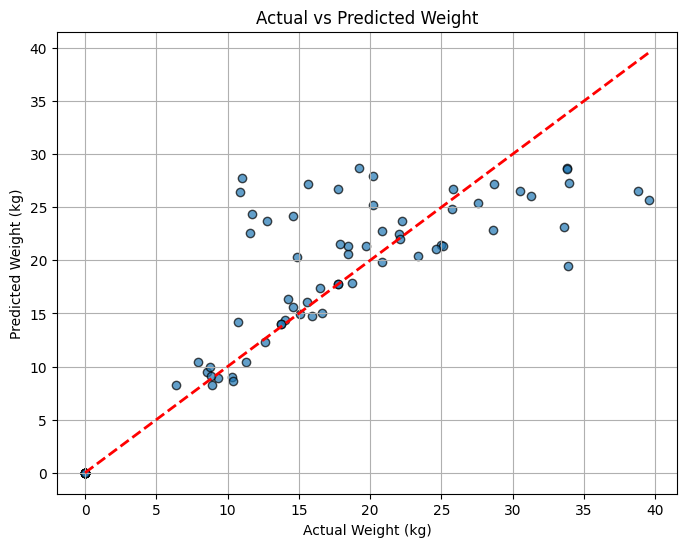

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('Actual vs Predicted Weight')
plt.grid(True)
plt.show()

In [11]:
import joblib
joblib.dump(model, 'model_milk_prediction.joblib')

['model_milk_prediction.joblib']

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cattle Breed         374 non-null    int64  
 1   Height (cm)          366 non-null    float64
 2   Age (years)          366 non-null    float64
 3   Feed (kg/day)        366 non-null    float64
 4   Lactation Stage      374 non-null    int64  
 5   Reproductive Status  374 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


In [14]:
import numpy as np
import joblib

# Load the saved model
model_file_path = 'model_milk_prediction.joblib'
loaded_model = joblib.load(model_file_path)

# Define the prediction method
def predict_weight(cattle_breed, height_cm, age_years, feed_kg_per_day, lactation_stage, reproductive_status):
    """
    Predict the weight of a cattle based on input features.

    Parameters:
        cattle_breed (int): Encoded value of the cattle breed.
        height_cm (float): Height of the cattle in cm.
        age_years (float): Age of the cattle in years.
        feed_kg_per_day (float): Daily feed intake in kg.
        lactation_stage (int): Encoded value of the lactation stage.

    Returns:
        float: Predicted weight of the cattle in kg.
    """
    # Prepare the input data
    input_data = np.array([[cattle_breed, height_cm, age_years, feed_kg_per_day, lactation_stage, reproductive_status]])

    # Predict using the loaded model
    predicted_weight = loaded_model.predict(input_data)

    return predicted_weight[0]

# Example usage
predicted_weight = predict_weight(cattle_breed=1, height_cm=130.5, age_years=5, feed_kg_per_day=10, lactation_stage=2, reproductive_status=1)
print(f"Predicted Milk Production: {predicted_weight:.2f} L")


Predicted Milk Production: 14.28 L


# **Comparison with other Regression types**

Linear Regression - Mean Squared Error: 78.6886, R² Score: 0.2397
Random Forest - Mean Squared Error: 32.1109, R² Score: 0.6897
Gradient Boosting - Mean Squared Error: 36.6907, R² Score: 0.6455
Support Vector Regression - Mean Squared Error: 96.6324, R² Score: 0.0663

Model Comparison:
                       Model        MSE        R²
0          Linear Regression  78.688649  0.239698
1              Random Forest  32.110887  0.689739
2          Gradient Boosting  36.690736  0.645488
3  Support Vector Regression  96.632394  0.066322


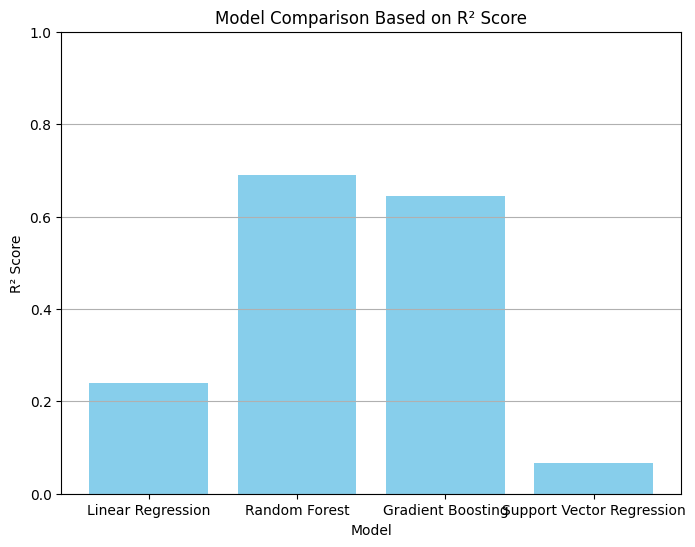

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(kernel='rbf')
}

# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R²': r2})
    print(f"{name} - Mean Squared Error: {mse:.4f}, R² Score: {r2:.4f}")

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results)

# Display results
print("\nModel Comparison:")
print(results_df)

# Plot R² scores for comparison
plt.figure(figsize=(8, 6))
plt.bar(results_df['Model'], results_df['R²'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Model Comparison Based on R² Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

# Testing

In [17]:
import numpy as np
import joblib

# Load the saved model
model_file_path = 'model_milk_prediction.joblib'
loaded_model = joblib.load(model_file_path)

# Encoding dictionaries for categorical variables
cattle_breed_encoding = {
    ' ': 0,
    'AUSTRALIAN MILKING ZEBU': 1,
    'AYRSHIRE': 2,
    'FRIESIAN': 3,
    'JERSEY': 4,
    'LANKA WHITE': 5,
    'SAHIWAL': 6,
    'nan': 7
}

lactation_stage_encoding = {
    'EARLY': 0,
    'LATE': 1,
    'MID': 2,
    'nan': 3
}

reproductive_status_encoding = {
    ' PREGNANT': 0,
    'NOT PREGNANT': 1,
    'PREGNANT': 2,
    'nan': 3
}

# Define the prediction method
def predict_milk(cattle_breed, height_cm, age_years, feed_kg_per_day, lactation_stage, reproductive_status):

    cattle_breed_encoded = cattle_breed_encoding.get(cattle_breed, 0)  # Default to 0 if not found
    lactation_stage_encoded = lactation_stage_encoding.get(lactation_stage, 3)  # Default to 3 if not found
    reproductive_status_encoded = reproductive_status_encoding.get(reproductive_status, 3)  # Default to 3 if not found

    # Prepare the input data
    input_data = np.array([[cattle_breed_encoded, height_cm, age_years, feed_kg_per_day, lactation_stage_encoded, reproductive_status_encoded]])

    # Predict using the loaded model
    predicted_milk = loaded_model.predict(input_data)

    return predicted_milk[0]

# Example usage
predicted_weight = predict_milk(
    cattle_breed='AYRSHIRE',
    height_cm=130.5,
    age_years=5,
    feed_kg_per_day=10,
    lactation_stage='MID',
    reproductive_status='PREGNANT'
)
print(f"Predicted Milk Prod: {predicted_weight:.2f} L")


Predicted Milk Prod: 21.46 L


# **Decision Tree**

Decision Tree Regressor - Mean Squared Error: 63.9859, R² Score: 0.3818


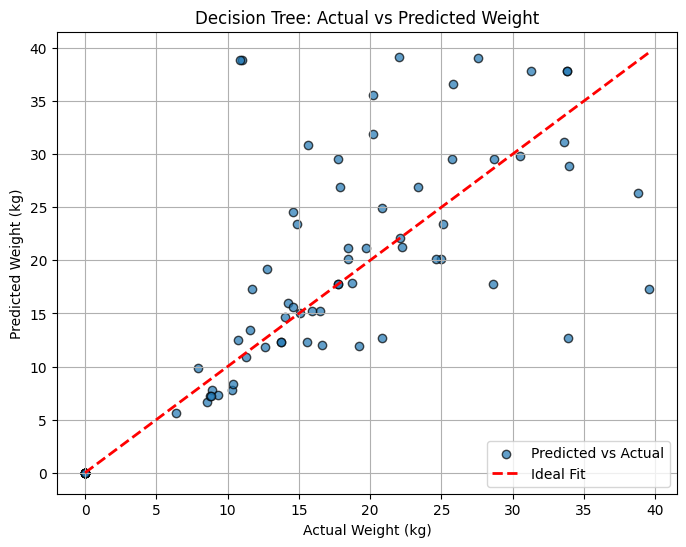

In [18]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Train a Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluate Decision Tree performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - Mean Squared Error: {mse_dt:.4f}, R² Score: {r2_dt:.4f}")

# Visualize Actual vs Predicted for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Weight (kg)')
plt.ylabel('Predicted Weight (kg)')
plt.title('Decision Tree: Actual vs Predicted Weight')
plt.legend()
plt.grid(True)
plt.show()
